# Excersise (A): two Sites

[(i)] $getIdentity$ function contract the tensor that user provided with Identity tensor along the leg whose index is provided. For instance, A = getIdentity(B,m), returns an Identity tensor which contracts with the $m^{th}$ index of B. The dimension of B will be the same as the dimension of the the leg $m$.

P.S: $size(B,idB)$ - returns the dimension of the leg of index idA.

In [ ]:
include("../Tensor.jl");

In [ ]:
LSpace = getLocalSpace("Spin",1/2)

LSpace is a 2-tuple containing S+ operator,S_ operator and Sz. The S+ and S_ operators are enclosed in a list.

In [ ]:
LSpace[1][ :,:,:]

In [ ]:
Sp = LSpace[1][:,1,:]*sqrt(2);
Sm = LSpace[1][:,2,:]*sqrt(2);

In [ ]:
Sp

In [ ]:
Sm

### Getting S+ and S_

- LSpace contain the info about the S+,S_ and Sz operators.
- LSpace[:,1,:] : spin raising operator S_+ multiplied with 1/sqrt(2)
- LSpace[:,2,:] : spin lowering operator S_- multiplied with 1/sqrt(2)
- LSpace[:,3,:] : spin-z operator S_z
- LSpace is an array made using cocatanation of these matrices.

An example of how the slicing works is given:

In [ ]:
A = [1 2 3;4 5 6]
B = ['c' 'd' 'e' ; 'f' 'g' 'h']
C = cat(A,B,dims=3)

For comparison look at the LSpace

**note**: <mark> getLocalSpace returns the spin matrices and Identity matrices. The result will be a tuple. But here we focus only on the first element.</mark>

In [ ]:
LSpace[1]

Now C[:,1,:] returns a $2 \times 2$ matrix with first column same as the first column of matrix A and Second column as the first column of B matrix.

In [ ]:
C[:,1,:]

In [ ]:
C[:,2,:]

In [ ]:
C[:,3,:]

#### A note on slicing:
A = rand(3,3) ==> gives a random $3 \times 3$ matrix
A = rand(2,3,4) ==> gives a tensor of dimension of $2 \times 3 \times 4$
 - Here, the tensor is composed of four $2\times 3$ matrices.
 - Each matrices can be accessed by slicing of this form [:,:,k]
    -  Where k goes from 1 to 4
 - First two semicolon select the $2\times 3$
    - Instead of semicolon if some number is provided, it returns some results but I was not able to understand it.

In [ ]:
Sx = (Sp + Sm)/2
Sx = reshape(Sx,(2,1,2))

In [ ]:
## Geting A
A = getIdentity(Sx,3,Sx,3)

In [ ]:
T = contract(Sx,3,2,Sx,3,2)
U = contract(conj(A),3,[1,2],T,4,[1,3]) # how the indexing done? also how the ordering?
SxSx = contract(U,3,[2,3],A,3,[1,2]);

In [ ]:
eigen((SxSx+SxSx')/2) # Hermitianize

## $S_y$

In [ ]:
Sy = reshape((Sp-Sm)/2, (2,1,2))
T = contract(Sy,3,2,Sy,3,2);
T = contract(conj(A),3,[1,2],T,4,[1,3]); # complex conjugate on A
SySy = contract(T,3,[2,3],A,3,[1,2]);


In [ ]:
Hxy = -(SxSx+SySy);
EigVal = eigen((Hxy+Hxy')/2) # Hermitianize

In [ ]:
EigVal.values

In [ ]:
EigVal.vectors

### Question b

[i] For representing $S^{x}_{l}$ and $S^{y}_{l}$ in the given basis we use an isometry A. It will be 3-rank isometry with 1st leg represent Hilbert space of $H_{l-1}$, 2nd leg represents the Hilbert space of the third legs of $S^{x}_{l}$ or $S^{y}_{l}$, 3rd leg represent the Hilbert space of $H_{l}$.

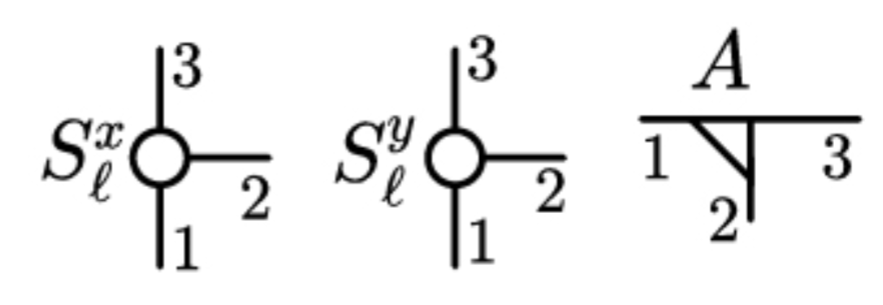

[ii]
#### $S_x$ / $S_y$
 - Dimension of leg 1 and 3 = d (usually 2)
 - Dimension of leg 2 = w (usually 1)
 
#### A
 - Dimension of leg 1 = D (Hilbert space of $H_{l-1}$)
 - Dimension of leg 2 = d 
 - Dimension of leg 3 = dD (Hilbert space of $H_l$)

#### Contraction Scheme

1. contract A* and $S^{x,y}_{l}$ ==> $\mathcal{O}(d^{3}D^{2}w)$
2. contract A and A*$S^{x,y}_{l}$ ==> $\mathcal{O}(d^{3}D^{3}w)$

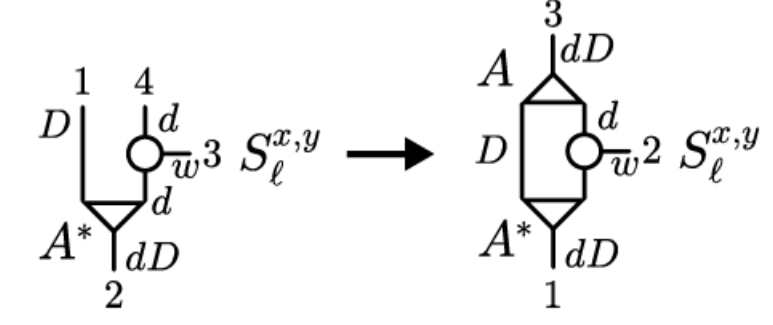


[iii] 
Here the identity tensor $A$ is occupied in the directproduct space of $H_{l}\otimes I_{l+1}$
- For $H_l$ the dimension of first and second leg is $D$
- For $A$ first leg represent dimension of Hilbert space of $H_l$, second leg Hilbert space of $I_{l+1}$ and third leg Hilbert space of $H_{l}\otimes I_{l+1}$.

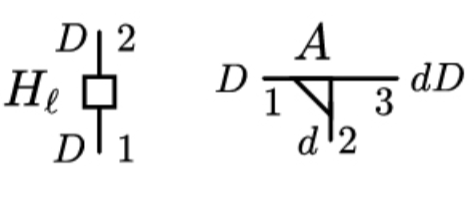

The contraction scheme is given below;

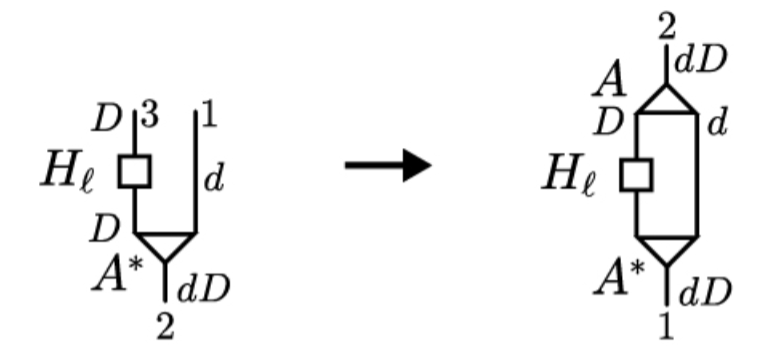

First contraction cause computational complexity of $\mathcal{O}(d^{2}D^{3}$) and second contraction have a computational complexity of $\mathcal{O}(d^{3}D^{4})$.


[iv]
![WhatsApp Image 2023-11-27 at 6.06.46 PM.jpeg](<attachment:WhatsApp Image 2023-11-27 at 6.06.46 PM.jpeg>)
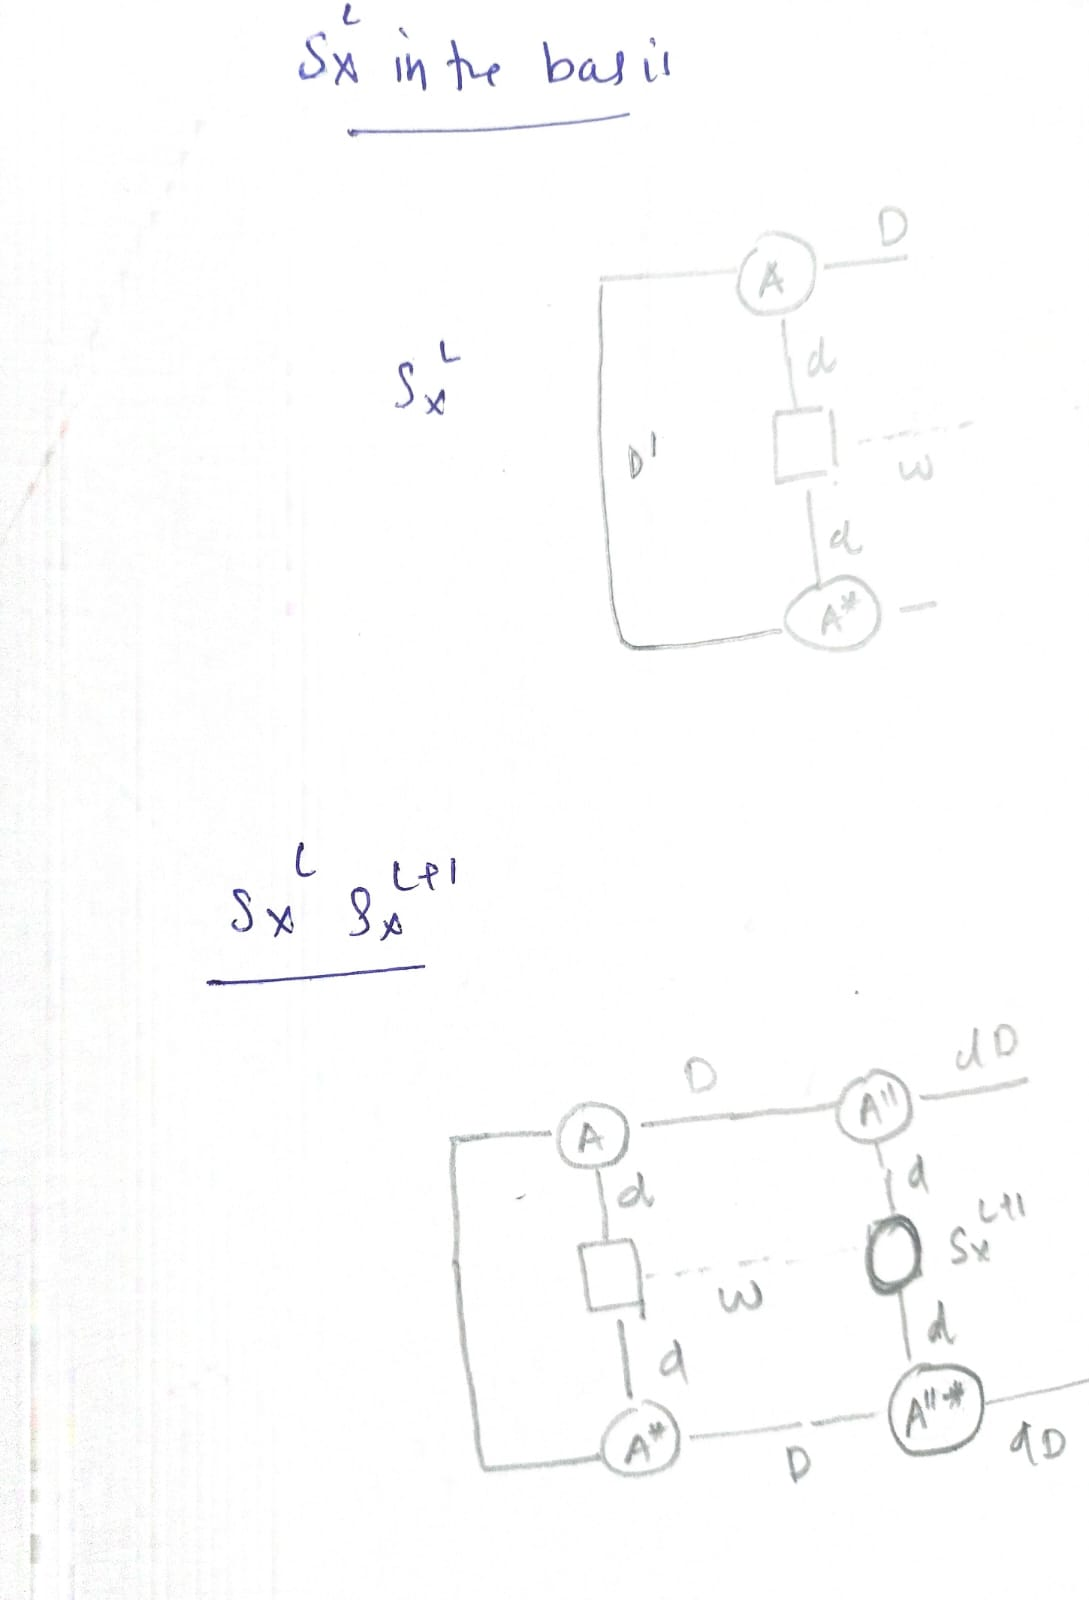

computation cost:

- contract $S_x^{l}$ (in the basis) with $S_x^{l+1}$ across the bond of dimension $W$
    - $\mathcal{O}(d^{2}D^{2}w)$ (before diagonalising $S_x^{l+1}$)
- contract $A''^{*}$ with $S_x^{l}S_x^{l+1}$ 
    - $\mathcal{O}(d^{3}D^{3})$
- contract $A''$ with $A''^{*}S_x^{l}S_x^{l+1}$ 
    - $\mathcal{O}(d^{3}D^{3})$

[v] 

$H_{l+1} = H_{l}\otimes\mathbb{I}_{l+1} - S^{x}_{l}S^{x}_{l+1} - S^{y}_{l}S^{y}_{l+1}$

I believe the Hamiltonian is written according to this logic:
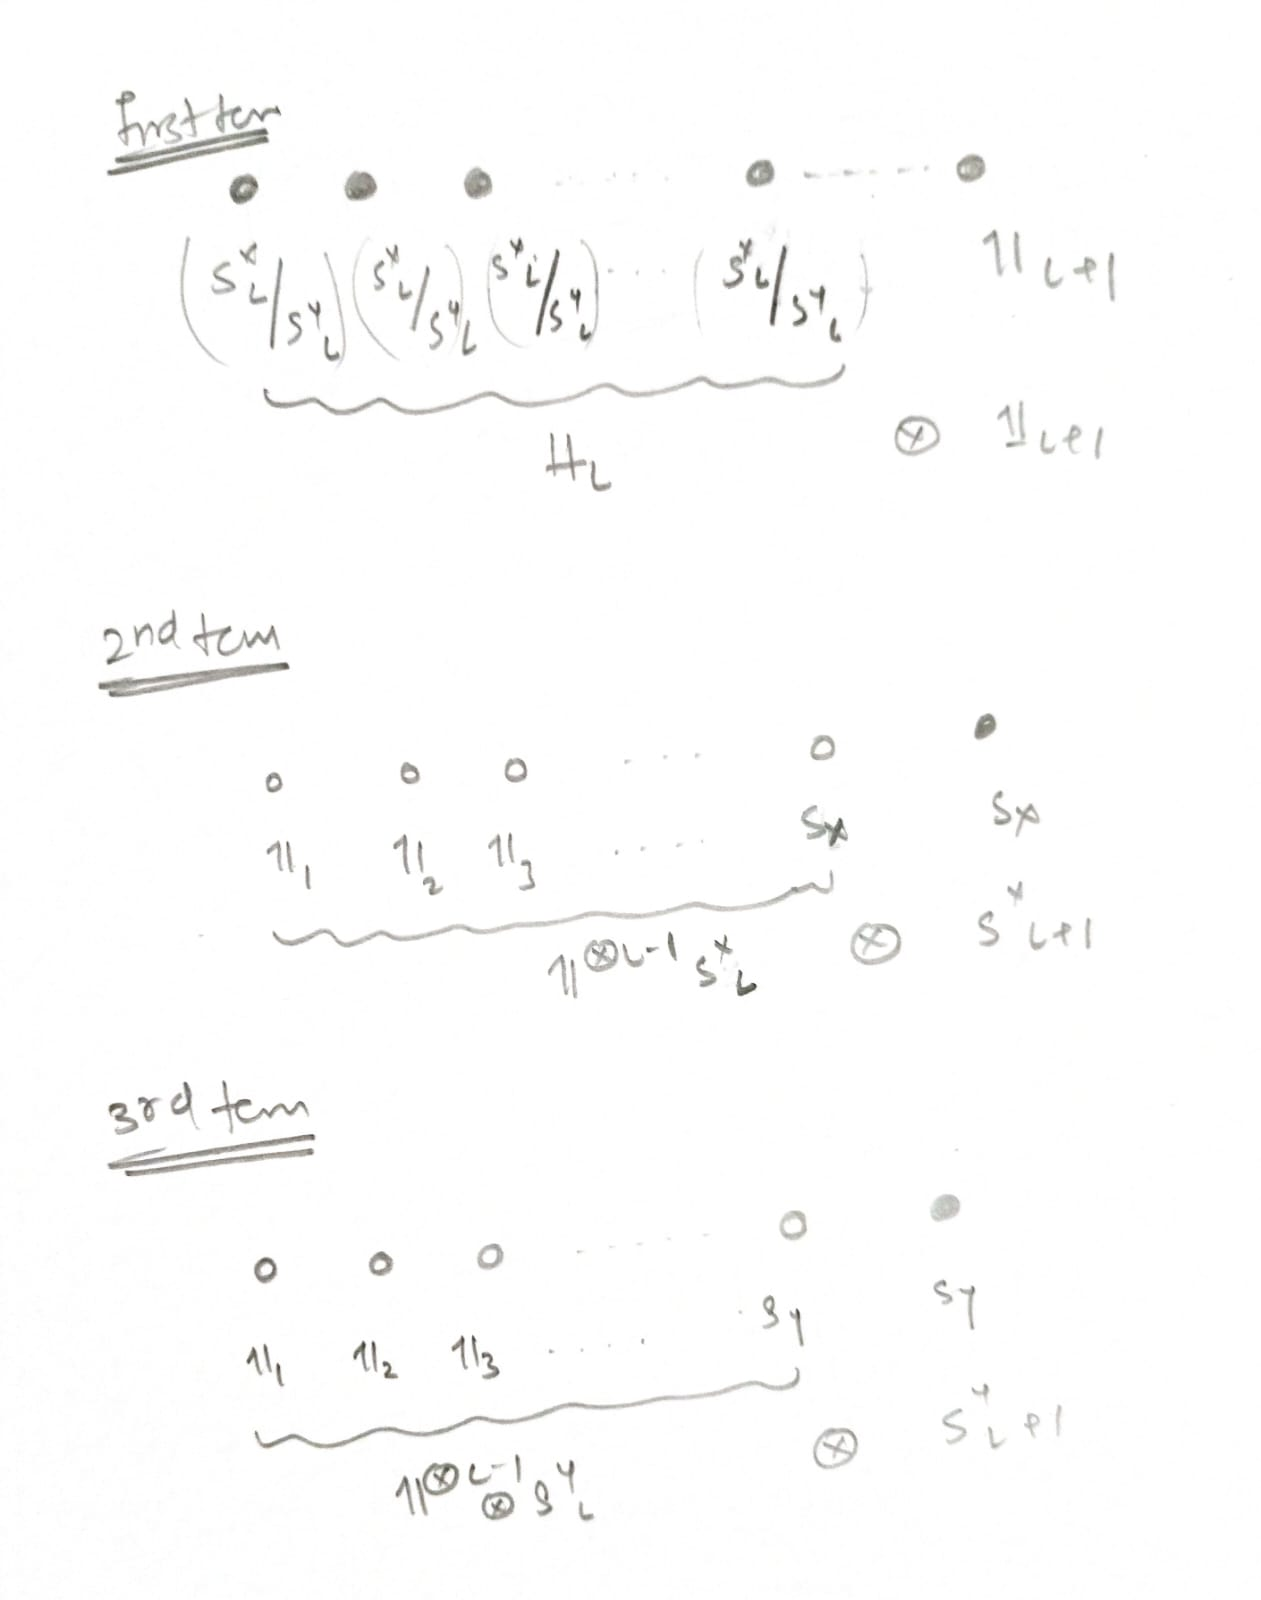

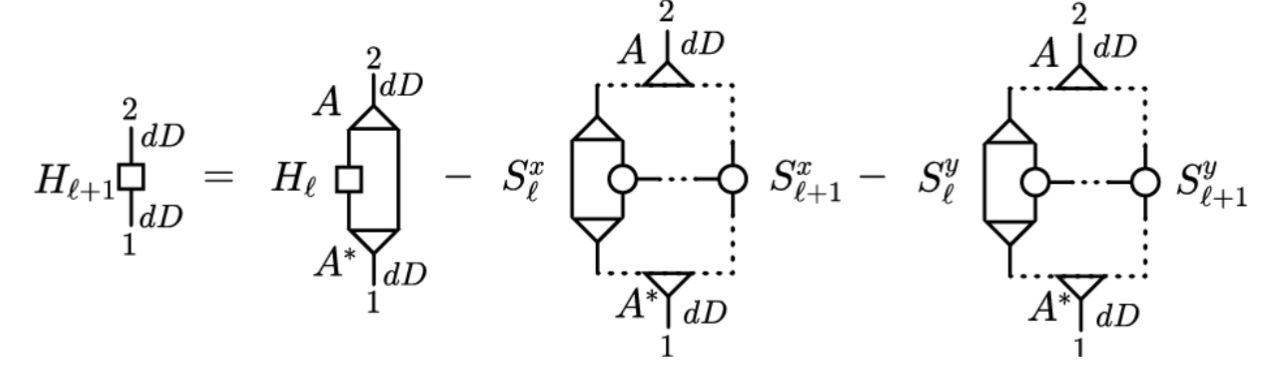

In [ ]:
#[vi]
include("../Tensor.jl");
N = 100;
Nkeep = 300;
tol = Nkeep*100*eps(); # numerical tolerance for degeneracy
LSpace,Id = getLocalSpace("Spin",1/2);
H0 = Id*0; # Hamiltonian for 1st site 
A0 = getIdentity(1,2,Id,2); # 1st leg is the dummy leg

# stores lowest energies of each iterations
E0 = zeros(1,N);

# initialization
Hnow = H0;
D,V = eigen((Hnow+Hnow')/2); 

Ak = contract(A0,3,2,V,2,1);
E0[1] = minimum(D); # minimum eigenvalue  
Hprev = diagm(D);

In [ ]:
Ak

In [ ]:
for itN in (2:N)

    global Ak,Hprev; # defining a global variable that can be accessed anywhere

    # the spin operator at the current site
    # used for generating coupling terms at the next iteration
    Sprev = updateLeft([],[],Ak,LSpace,3,Ak) # why LSpace (it contains info about S+.S_ and Sz)
    ## why updateleft is it writing spin operators in the chosen basis

    # adding new site
    Anow = getIdentity(Hprev,2,Id,2)
    Hnow = updateLeft(Hprev,2,Anow,[],[],Anow) ## H_{l} \otimes I_{l+1}
    # above steps will enlarge the Hilbert Space.
    # Since add a new site to new site.

    # Spin-Spin interaction
    Sprev_x = (Sprev[:,1,:] + Sprev[:,2,:])/sqrt(2); Rx = size(Sprev_x);
    Sprev_y = (Sprev[:,1,:] - Sprev[:,2,:])/sqrt(2)/1im; Ry = size(Sprev_y); # 1im introduces imaginary unit
    if length(Rx) == 2; Sprev_x = reshape(Sprev_x, (Rx[1],1,Rx[2]));end;
    if length(Ry) == 2; Sprev_y = reshape(Sprev_y, (Ry[1],1,Ry[2]));end;

    Sx = reshape((LSpace[:,1,:]+LSpace[:,2,:])/sqrt(2),(2,1,2));
    Sy = reshape((LSpace[:,1,:]-LSpace[:,2,:])/sqrt(2)/1im,(2,1,2));

    Hxy = -updateLeft(Sprev_x,3,Anow,Sx,3,Anow)-updateLeft(Sprev_y,3,Anow,Sy,3,Anow);

    # H_{l+1} = H_{l}\otimes\mathbb{I}_{l+1} - S^{x}_{l}S^{x}_{l+1} - S^{y}_{l}S^{y}_{l+1}

    Hnow = Hnow + Hxy

    # Diagonalization of the Hnew
    D,V = eigen((Hnow+Hnow')/2)
    ids = sortperm(D) # Returns a vector of indices that, 
    ## if used to index D, would give you a sorted version of D.
    D = D[ids]
    V = V[:,ids] # Each column correspond to eigen vector
    ## Sorting eigen vectors according to the eigen values.

    E0[itN] = minimum(D) # getting the new ground state

    # truncation threshold for energy
    Etr = D[min(length(D),Nkeep)] # maximum energy upto the threshold
    oks = (D.< (Etr+tol)) # returns an array of length(D) of the form [true,true,...true,false,false..false]
    # true: to keep, false: not to keep
    # keep all degenerate states upto tolerance
    
    Ak = contract(Anow,3,3,V[:,oks],2,1) # the matrix of eigen vectors is truncated upto column where it is true.
    Hprev = diagm(D[oks]) # New Diagonalized Hamiltonian.
    #print(itN)
    
end



In [ ]:
Eiter = E0[end];
Eexact = (1/2)-1/(2*sin(pi/(2*(N+1))));
err = 100*abs(1-Eiter/Eexact)

## Excercise C

In [1]:
#[vi]
include("../Tensor.jl");
N = 200;
Nkeep = 300;
tol = Nkeep*100*eps(); # numerical tolerance for degeneracy
LSpace,Id = getLocalSpace("Spin",1/2);
H0 = Id*0; # Hamiltonian for 1st site 
A0 = getIdentity(1,2,Id,2); # 1st leg is the dummy leg

# stores lowest energies of each iterations
E0 = zeros(1,100);

# initialization
Hnow = H0;
D,V = eigen((Hnow+Hnow')/2); 

Ak = contract(A0,3,2,V,2,1);
E0[1] = minimum(D); # minimum eigenvalue  
Hprev = diagm(D);

for itN in (2:N)

    global Ak,Hprev; # defining a global variable that can be accessed anywhere

    # the spin operator at the current site
    # used for generating coupling terms at the next iteration
    Sprev = updateLeft([],[],Ak,LSpace,3,Ak) # why LSpace (it contains info about S+.S_ and Sz)
    ## why updateleft is it writing spin operators in the chosen basis

    # adding new site
    Anow = getIdentity(Hprev,2,Id,2)
    Hnow = updateLeft(Hprev,2,Anow,[],[],Anow) ## H_{l} \otimes I_{l+1}
    # above steps will enlarge the Hilbert Space.
    # Since add a new site to new site.

    # Spin-Spin interaction
    Sprev_x = (Sprev[:,1,:] + Sprev[:,2,:])/sqrt(2); Rx = size(Sprev_x);
    Sprev_y = (Sprev[:,1,:] - Sprev[:,2,:])/sqrt(2)/1im; Ry = size(Sprev_y); # 1im introduces imaginary unit
    if length(Rx) == 2; Sprev_x = reshape(Sprev_x, (Rx[1],1,Rx[2]));end;
    if length(Ry) == 2; Sprev_y = reshape(Sprev_y, (Ry[1],1,Ry[2]));end;

    Sx = reshape((LSpace[:,1,:]+LSpace[:,2,:])/sqrt(2),(2,1,2));
    Sy = reshape((LSpace[:,1,:]-LSpace[:,2,:])/sqrt(2)/1im,(2,1,2));

    Hxy = -updateLeft(Sprev_x,3,Anow,Sx,3,Anow)-updateLeft(Sprev_y,3,Anow,Sy,3,Anow);

    # H_{l+1} = H_{l}\otimes\mathbb{I}_{l+1} - S^{x}_{l}S^{x}_{l+1} - S^{y}_{l}S^{y}_{l+1}

    Hnow = Hnow + Hxy

    # Diagonalization of the Hnew
    D,V = eigen((Hnow+Hnow')/2)
    ids = sortperm(D) # Returns a vector of indices that, 
    ## if used to index D, would give you a sorted version of D.
    D = D[ids]
    V = V[:,ids] # Each column correspond to eigen vector
    ## Sorting eigen vectors according to the eigen values.

    if mod(itN,2) == 0
        E0[convert(Int,itN/2)] = minimum(D); # only even site
    end

    # truncation threshold for energy
    Etr = D[min(length(D),Nkeep)] # maximum energy upto the threshold
    oks = (D.< (Etr+tol)) # returns an array of length(D) of the form [true,true,...true,false,false..false]
    # true: to keep, false: not to keep
    # keep all degenerate states upto tolerance
    
    Ak = contract(Anow,3,3,V[:,oks],2,1) # the matrix of eigen vectors is truncated upto column where it is true.
    Hprev = diagm(D[oks]) # New Diagonalized Hamiltonian.
    #print(itN)
    
end



In [2]:
Eiter = E0;
Eexact = (1/2) .-1 ./(2*sin.(pi./(2*((2:2:N).+1)))); # exact GS energy for a given N

## note

collect(2:2:10) ==> [2,3,4,6,10]

Eiter'./(2:2:N) ==> performs element wise division -- total energy divided by number of sites

In [6]:
plot(collect(2:2:N), 100 .*(1 .-(Eiter'./ Eexact)), label = "",
    xlabel = "Chain Length", ylabel = "GS Energy Error %")

UndefVarError: UndefVarError: `plot` not defined

## Excercise D

[a] The isometry is a 3-rank tensor mapping $H_{l-1}$ to $H_{l}$.

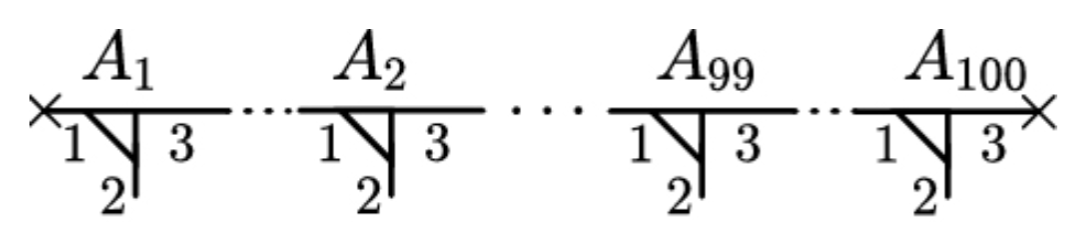

In [6]:
N = 100; # maximum chain length()
Nkeep = 300; # maximal number of states to keep
LSpace,Id = getLocalSpace("Spin",1/2)

H0 = Id*0; # Hamiltonian for only the 1st site
A0 = getIdentity(1,2,Id,2); # 1st leg is dummy leg (vacuum)

# MPS of the GS
A = Array{Any}(undef,1,N);
# Array{Any} - creates an array that can hold any type of data.
# (undef,1,N) - creates a 1D array of N elements currently holding undefined values.

# initialization
Hnow = H0
D,V = eigen((Hnow+Hnow')/2)
A[1] = contract(A0,3,3,V,2,1)
Hprev = diagm(D)

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

Here the main difference is instead of storing the energy values, we are storing the Ak values of previous values 

In [12]:
for itN in (2:N)

    global A, Hprev;

    # step [i-ii]
    # spin operator at the current site; to be used for generating
    # the coupling term at the next iteration
    Sprev = updateLeft([],[],A[itN-1],LSpace,3,A[itN-1])
    
    # step [iii]
    # # add new site
    Anow = getIdentity(Hprev,2,Id,2)
    Hnow = updateLeft(Hprev,2,Anow,[],[],Anow)
    # update the Hamiltonian up to the last sites
    # to the enlarged Hilbert space
    
    # step [iv]
    # # spin-spin interaction
    Sprev_x = (Sprev[:,1,:]+Sprev[:,2,:])/sqrt(2); Rx = size(Sprev_x);
    Sprev_y = (Sprev[:,1,:]-Sprev[:,2,:])/sqrt(2)/1im; Ry = size(Sprev_y);
    if length(Rx) == 2; Sprev_x = reshape(Sprev_x,(Rx[1],1,Rx[2])); end;
    if length(Ry) == 2; Sprev_y = reshape(Sprev_y,(Ry[1],1,Ry[2])); end;
    Sx = reshape((LSpace[:,1,:]+LSpace[:,2,:])/sqrt(2),(2,1,2));
    Sy = reshape((LSpace[:,1,:]-LSpace[:,2,:])/sqrt(2)/1im,(2,1,2));
    Hxy = - updateLeft(Sprev_x,3,Anow,Sx,3,Anow) - updateLeft(Sprev_y,3,Anow,Sy,3,Anow)
    
    # step [v]
    Hnow = Hnow+Hxy
    
    # diagonalize the current Hamiltonian
    D,V = eigen((Hnow+Hnow')/2)
    # sort eigenvalues & eigenvectors in the order of increasing
    # eigenvalues
    ids = sortperm(D)
    D = D[ids]
    V = V[:,ids]
    
    # truncation threshold for energy
    Etr = D[min(length(D),Nkeep)]
    oks = (D .< Etr)
    # true: to keep; false: not to keep
    # keep all degenerate states up to tolerance
    
    if itN < N
        A[itN] = contract(Anow,3,3,V[:,oks],2,1)
    else
        A[itN] = contract(Anow,3,3,reshape(V[:,1],(size(V[:,1])[1],1)),2,1) # select GS at the last step
    end
    Hprev = diagm(D[oks])
    
end

[ii] The GS MPS is in a left canonical form. Each isometry tensor $A$ satisfies 
the left normalization condition $A A^\ast = I$.

In [14]:
using Printf

norm_GS_MPS = contract(A[1],3,[1,2],conj(A[1]),3,[1,2]);
for itN = (2:N)
    norm_GS_MPS = contract(norm_GS_MPS,2,2,A[itN],3,1);
    norm_GS_MPS = contract(norm_GS_MPS,3,[1,2],conj(A[itN]),3,[1,2]);
end
@printf("The norm of the GS MPS: %.4f",norm_GS_MPS[1])

The norm of the GS MPS: 1.0000